In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.layers import Dense,Flatten,Input
from keras.models import Sequential
from keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import BatchNormalization
from keras.utils.data_utils import get_file
from keras.initializers import he_normal
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import   VGG19 

In [2]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [3]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#onehot 
y_train = to_categorical(y_train,num_classes=10)
y_test = to_categorical(y_test,num_classes=10)

# data preprocessing 使用rbg均質
x_train[:, :, :, 0] = (x_train[:, :, :, 0]-123.680)
x_train[:, :, :, 1] = (x_train[:, :, :, 1]-116.779)
x_train[:, :, :, 2] = (x_train[:, :, :, 2]-103.939)
x_test[:, :, :, 0] = (x_test[:, :, :, 0]-123.680)
x_test[:, :, :, 1] = (x_test[:, :, :, 1]-116.779)
x_test[:, :, :, 2] = (x_test[:, :, :, 2]-103.939)


In [4]:
#放大圖片
def resize_img(img):
    numberOfImage = img.shape[0]
    new_array = np.zeros((numberOfImage, 96,96,3))
    for i in range(numberOfImage):
        new_array[i] = cv2.resize(img[i,:,:,:],(96,96))
    return new_array

x_train = resize_img(x_train)
x_test = resize_img(x_test)


In [5]:
vgg = VGG19(include_top=False,input_shape=(96,96,3))

vgg.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 96, 96, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 96, 96, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 48, 48, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 48, 48, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 48, 48, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 24, 24, 128)       0     

In [6]:
model = Sequential()

for layer in vgg.layers:
    model.add(layer)
    
for layer in model.layers:
    layer.trainable = False
    
# model modification for cifar-10
model.add(Flatten(name='flatten'))
model.add(Dense(4096,name='fc_cifa10'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(4096,kernel_initializer=he_normal(),name='fc2'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(10, name='predictions_cifa10'))
model.add(BatchNormalization())
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 96, 96, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 96, 96, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 48, 48, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 48, 48, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 48, 48, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 24, 24, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 24, 24, 256)       2

In [7]:
model.compile(optimizer="RMSprop",loss="categorical_crossentropy",metrics=["accuracy"])

hist = model.fit(x_train,y_train,validation_split=0.15,epochs=20,batch_size=1000)

Epoch 1/20
43/43 [==============================] - 97s 2s/step - loss: 0.8665 - accuracy: 0.7837 - val_loss: 0.8296 - val_accuracy: 0.7708
Epoch 2/20
43/43 [==============================] - 66s 2s/step - loss: 0.6179 - accuracy: 0.8723 - val_loss: 0.7936 - val_accuracy: 0.8125
Epoch 3/20
43/43 [==============================] - 67s 2s/step - loss: 0.4887 - accuracy: 0.9180 - val_loss: 0.9477 - val_accuracy: 0.8019
Epoch 4/20
43/43 [==============================] - 67s 2s/step - loss: 0.3809 - accuracy: 0.9544 - val_loss: 1.0214 - val_accuracy: 0.7721
Epoch 5/20
43/43 [==============================] - 67s 2s/step - loss: 0.2994 - accuracy: 0.9732 - val_loss: 0.9663 - val_accuracy: 0.7649
Epoch 6/20
43/43 [==============================] - 67s 2s/step - loss: 0.2436 - accuracy: 0.9825 - val_loss: 0.7187 - val_accuracy: 0.8365
Epoch 7/20
43/43 [==============================] - 67s 2s/step - loss: 0.2041 - accuracy: 0.9872 - val_loss: 0.6830 - val_accuracy: 0.8407
Epoch 8/20
43/43 [==

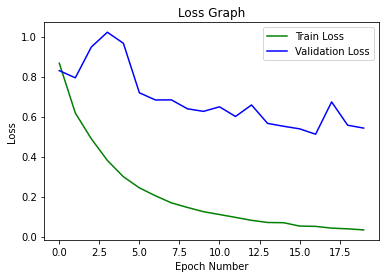

In [8]:
plt.subplots(figsize=(6,4))
plt.plot(hist.epoch,hist.history["loss"],color="green",label="Train Loss")
plt.plot(hist.epoch,hist.history["val_loss"],color="blue",label="Validation Loss")
plt.xlabel("Epoch Number")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Graph")
plt.show()

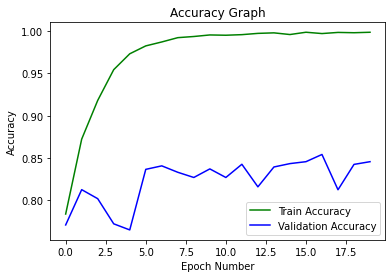

In [9]:
plt.subplots(figsize=(6,4))
plt.plot(hist.epoch,hist.history["accuracy"],color="green",label="Train Accuracy")
plt.plot(hist.epoch,hist.history["val_accuracy"],color="blue",label="Validation Accuracy")
plt.xlabel("Epoch Number")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy Graph")
plt.show()